In [2]:
%matplotlib qt5
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as mpd
import numpy as np

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as off

import IPython.display as disp

In [3]:
%matplotlib inline

off.init_notebook_mode(connected=True)

# Tut 11 - Integrale


<p style="font-size: 18pt;">
$$
\oint\limits_{\partial A} \big( \vec{E} +
\vec{v} \times \vec{B}) \cdot d \vec{s}
= -\frac{d \Phi}{dt} \\
\oint\limits_{\partial A} \vec{E} \cdot d \vec{s}
= - \int\limits_A \frac{\partial \vec{B}}{\partial t}
\cdot d \vec{S}
$$
</p>

*Jochen Illerhaus - jochen.illerhaus@student.kit.edu*

# Orga

<ul style="font-size: 30pt; line-height: 1.5;">
<li><a href="http://bit.ly/2HayX3w">http://bit.ly/2HayX3w</a></li>
<li>jochen.illerhaus@student.kit.edu</li>
</ul>

<h2 style="text-align: center; font-size: 64pt;">Fragen</h2>

# Gaußscher Integralsatz

$$
\oint\limits_{\partial G} \vec{v} \cdot \, d \vec{s} = 
\iint\limits_{G} \big( \partial_1 v_2 - \partial_2 v_1 \big) d(x, \, y)
$$


# Blatt 11 Aufgabe 1

Es sei $\gamma$ eine Kurve, deren Träger der positiv durchlaufene Rand des Dreiecks mit den Ecken $(0, \, 0)\, ,\; (1, \, 0)$ und $(0, \, 1)$ ist. $\vec{v}: \mathbb{R}^2 \to \mathbb{R}^2$ sei gegeben durch

$$\vec{v}(x, \, y) = \begin{pmatrix} x^2 + xy \\ x^2 y − y^2 \end{pmatrix}$$

Berechnen Sie $\int\limits_\gamma \vec{v}\cdot \, d\vec{s}$ zunächst direkt und anschließend mit dem Gaußschen Integralsatz.

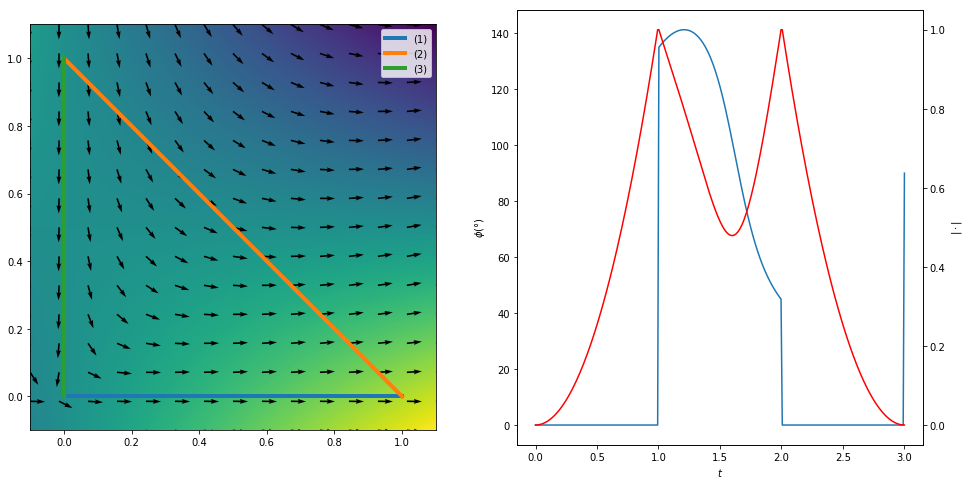

In [72]:
fig, (axa, axb) = plt.subplots(1, 2, figsize=(16, 8))

lims = (-0.1, 1.1)

x, y = np.meshgrid(np.linspace(*lims, 15), np.linspace(*lims, 15))
u, v = x**2 + x*y, x**2*y - y**2
r = np.sqrt(u**2 + v**2)
u = u/r
v = v/r
r = r/np.max(r)

q = axa.quiver(x, y, u, v)

l = 4
axa.plot([0, 1], [0, 0], linewidth=l, label="(1)")
axa.plot([1, 0], [0, 1], linewidth=l, label="(2)")
axa.plot([0, 0], [1, 0], linewidth=l, label="(3)")

X, Y = np.meshgrid(np.linspace(*lims, 800), np.linspace(*lims, 800))
R = X*(2*Y-1)
axa.imshow(R, extent=[*lims, *lims]);

axa.legend()

f = lambda x, y: np.arctan2(x**2*y - y**2, x**2 + x*y)*180/np.pi
t = np.linspace(0, 1, 100)
I = np.zeros(300)
I[0:100] = f(t, 0)
I[100:200] = f(1-t, t) + 135
I[200:300] = f(0, 1-t) + 90
T = np.linspace(0, 3, 300)
axb.plot(T, I)
axb.set_xlabel("$t$")
axb.set_ylabel("$\\phi (°)$");
axbb = axb.twinx()
g = lambda x, y: np.sqrt((x**2*y - y**2)**2 + (x**2 + x*y)**2)
J = np.zeros(300)
J[0:100] = g(t, 0)
J[100:200] = g(1-t, t)
J[200:300] = g(0, 1-t)
axbb.plot(T, J, 'r')
axbb.set_ylabel("$|\\cdot|$");

# Blatt 11 Aufgabe 2a

Berechnen Sie das Volumen der Menge
$$
A = \Big\{ \big(x, \, y, \, z \big) \in \mathbb{R}^3 
\,: \;  
1 \leq x \leq 2 
\, , \;
0 \leq z \leq x^2−y^2 \Big\}
$$

In [24]:
x, y = np.meshgrid(np.linspace(1, 2, 100), np.linspace(1, 2, 100))
z = x**2 - y**2

surface = go.Surface(x=x, y=y, z=z)
data = [surface]

layout = go.Layout(
    #title=title,
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
off.plot(fig, filename="2a.html")
disp.display(disp.HTML("<a style='font-size: 36pt;' href='2a.html' target='_blank'>Plot</a>"))

# Blatt 11 Aufgabe 2b

Die  beschränkte  Menge $B \subset \mathbb{R}^3$ sei  durch  die  Ebenen $x = 0$, $y = 0$, $z = 0$  und $x+y+ 2z = 1$ begrenzt. Berechnen Sie das Integral $\iiint\limits_B \sin(z) \, d(x, \, y, \,z)$

In [76]:
x, y = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
null = np.zeros_like(x)

o = 0.85
data = [go.Surface(x=x, y=y, z=0.5*(1-x-y), opacity=o),
        go.Surface(x=x, y=y, z=null, opacity=o),
        go.Surface(x=x, y=null, z=y, opacity=o),
        go.Surface(x=null, y=x, z=y, opacity=o),
        go.Scatter3d(x=[0,1], y=[0,0], z=[0,0],
                     marker=dict(size=0), line=dict(width=4, color="black")),
        go.Scatter3d(x=[0,0], y=[0,1], z=[0,0],
                     marker=dict(size=0), line=dict(width=4, color="black")),
        go.Scatter3d(x=[0,0], y=[0,0], z=[0,0.5],
                     marker=dict(size=0), line=dict(width=4, color="black")),
        go.Scatter3d(x=[0,1], y=[0,0], z=[0.5,0],
                     marker=dict(size=0), line=dict(width=4, color="black")),
        go.Scatter3d(x=[0,0], y=[0,1], z=[0.5,0],
                     marker=dict(size=0), line=dict(width=4, color="black")),
        go.Scatter3d(x=[1,0], y=[0,1], z=[0,0],
                     marker=dict(size=0), line=dict(width=4, color="black")),
       ]

layout = go.Layout(
    #title=title,
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
off.plot(fig, filename="2b.html")
disp.display(disp.HTML("<a style='font-size: 36pt;' href='2b.html' target='_blank'>Plot</a>"))

# Blatt 11 Aufgabe 3

Bestimmen Sie für alle $a, \, b, \, c > 0$ das Volumen $\iiint\limits_E d(x, \, y, \, z)$ des Ellipsoids

$$
E = \bigg\{ \big( x, \, y, \, z) \in \mathbb{R}^3 
\, : \; 
\Big(\frac{x}{a}\Big)^2 + 
\Big(\frac{y}{b}\Big)^2 +
\Big(\frac{z}{c}\Big)^2 \leq 1 \bigg\}
$$

<div><img src="Ellipsoide.svg" /></div>
<span style="font-size: 7pt;"><em>Quelle:</em> Ellipsoid</span>

<center>
<span style="font-size: 40pt; line-height: 100px;">
Fragen
</span>
</center>

<center>
<span style="font-size: 40pt; line-height: 100px;">
Vielen Dank
</span>
</center>

In [79]:
# Don't forget to save first                             --SlidesExporter.reveal_scroll=False
!jupyter nbconvert Tut12.ipynb --to slides --reveal-prefix ./../../../../reveal --SlidesExporter.reveal_theme=white 
!ls

[NbConvertApp] Converting notebook Tut12.ipynb to slides
[NbConvertApp] Writing 432929 bytes to Tut12.slides.html
2a.html  2b.html  custom.css  Ellipsoide.svg  Tut12.ipynb  Tut12.slides.html


$\rho, \delta$